# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [2]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [3]:
# frequency table for prestige and whether or not someone was admitted
df['prestige'].value_counts()

2.0    148
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

In [4]:
df['admit'].value_counts()

0    271
1    126
Name: admit, dtype: int64

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [5]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix = 'prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0           0.0           0.0           1.0           0.0
1           0.0           0.0           1.0           0.0
2           1.0           0.0           0.0           0.0
3           0.0           0.0           0.0           1.0
4           0.0           0.0           0.0           1.0


#### 2.2 When modeling our class variables, how many do we need? 



Answer: 

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [6]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           0.0           1.0           0.0
1      1  660.0  3.67           0.0           0.0           1.0           0.0
2      1  800.0  4.00           1.0           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           0.0           1.0


In [7]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
pd.crosstab(df['admit'], dummy_ranks['prestige_1.0'])

prestige_1.0,0.0,1.0
admit,,
0,243,28
1,93,33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [14]:
odds_prestige_1 = 33./28
print odds_prestige_1

1.17857142857


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [15]:
odds_not_prestige_1 = 93./243
print odds_not_prestige_1

0.382716049383


#### 3.3 Calculate the odds ratio

In [16]:
odds_ratio = odds_prestige_1/odds_not_prestige_1
print odds_ratio

3.07949308756


#### 3.4 Write this finding in a sentenance: 

### Answer: By attending a #1 ranked college, the probablity of getting admitted is 3 times higher than if one did not attend a #1 ranked college

#### 3.5 Print the cross tab for prestige_4

In [12]:
pd.crosstab(df['admit'], dummy_ranks['prestige_4.0'])

prestige_4.0,0.0,1.0
admit,,
0,216,55
1,114,12


#### 3.6 Calculate the OR 

In [17]:
odds_prestige_4 = 12./55
odds_not_prestige_4 = 114./216
odd_ratio_4 = odds_prestige_4/odds_not_prestige_4
print odd_ratio_4

0.413397129187


#### 3.7 Write this finding in a sentence

Answer: by attending a #4 ranked college, the chances of getting admitted is lessened by almost half than if you did not attend a #4 ranked college

## Part 4. Analysis

In [18]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           1.0           0.0
1      1  660.0  3.67           0.0           1.0           0.0
2      1  800.0  4.00           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           1.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [19]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [20]:
train_cols = data.columns[1:]

#### 4.2 Fit the model

In [21]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [22]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 18 Aug 2016   Pseudo R-squ.:                 0.08166
Time:                        01:54:53   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [23]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: Compared to one who attended a #1 ranked school, an individual who attended a #2 ranked school is half as likely to get admitted.

#### 4.6 Interpret the OR of GPA

Answer: 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [24]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [25]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [26]:
# recreate the dummy variables

# keep only what we need for making predictions
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
train_cols = combos.columns[1:]

In [27]:
combos.head()

,gre,gpa,prestige,intercept,prestige_2,prestige_3,prestige_4
0,220.0,2.260000,1.0,1.0,0.0,0.0,0.0
1,220.0,2.260000,2.0,1.0,1.0,0.0,0.0
2,220.0,2.260000,3.0,1.0,0.0,1.0,0.0
3,220.0,2.260000,4.0,1.0,0.0,0.0,1.0
4,220.0,2.453333,1.0,1.0,0.0,0.0,0.0


#### 5.2 Make predictions on the enumerated dataset

In [28]:
combos['admit_pred'] = result.predict(combos[train_cols])
print combos.loc[396:399]

       gre  gpa  prestige  intercept  prestige_2  prestige_3  prestige_4  \
396  800.0  4.0       1.0        1.0         0.0         0.0         0.0   
397  800.0  4.0       2.0        1.0         1.0         0.0         0.0   
398  800.0  4.0       3.0        1.0         0.0         1.0         0.0   
399  800.0  4.0       4.0        1.0         0.0         0.0         1.0   

     admit_pred  
396    0.526992  
397    0.389060  
398    0.528304  
399    0.192979  


#### 5.3 Interpret findings for the last 4 observations

Answer: for row 396, we are predicting that this person has a 53% chance of getting admitted, 39%, 53%, and 19%, respectively for the subsequent rows.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

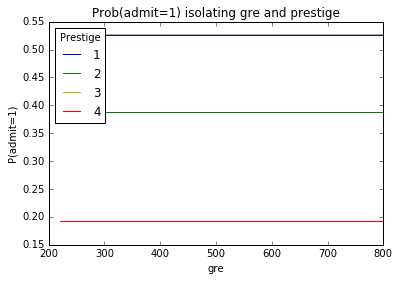

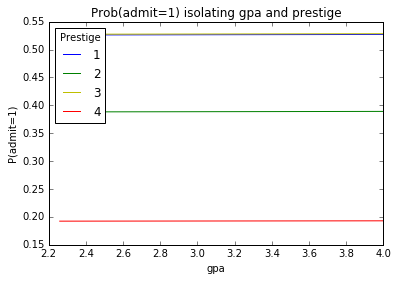

In [29]:
def isolate_and_plot(variable):
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)

    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and prestige")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')
